<a href="https://colab.research.google.com/github/lunaB/AI-Experiment/blob/master/XOR%20perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [0]:
X = torch.Tensor([[0.,0.],[0.,1.], [1.,0.], [1.,1.]])
Y = torch.Tensor([0.,1.,1.,0.]).view(-1,1)

In [0]:
class ReaLU(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        # x = input.clone()
        # x[ x < 0 ] = 0
        # x[ x > 1.6 ] = 0
        # 이렇게 하면 문제생김 (디버깅 5시간 ㅠ)
        
        x = input.clone()
        x[ input > 1.4 ] = 0
        x[ input < 0 ] = 0
        return x

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input > 1.4 ] = 0
        grad_input[input < 0] = 0
        return grad_input

In [0]:
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        
        self.lin1 = nn.Linear(input_dim, output_dim)
        realu = ReaLU()
        self.realu1 = realu.apply

    def forward(self, x):
        x = self.lin1(x)
        x = self.realu1(x)
        return x

In [0]:
model = XOR()

In [0]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [0]:
optimizer = optim.Adam(model.parameters(), lr=0.002)

In [154]:
epochs = 1001
steps = X.size(0)
# loss_func = nn.MSELoss()
for i in range(epochs):
    loss_sum = 0
    for j in range(steps):
        data_point = np.random.randint(X.size(0))

        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        # loss = loss_func.forward(y_hat, y_var)
        loss = (y_hat - y_var).pow(2).sum()
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()
        
    if i % 100 == 0:
        print("Epoch: %d, Loss: %f, "%(i, loss_sum))
        print(model(Variable(X, requires_grad=False)))

Epoch: 0, Loss: 0.164032, 
tensor([[0.0400],
        [1.0025],
        [0.6054],
        [0.0000]], grad_fn=<ReaLUBackward>)
Epoch: 100, Loss: 0.024980, 
tensor([[0.1235],
        [1.0010],
        [0.9334],
        [0.0000]], grad_fn=<ReaLUBackward>)
Epoch: 200, Loss: 0.004092, 
tensor([[0.0487],
        [0.9982],
        [0.9718],
        [0.0000]], grad_fn=<ReaLUBackward>)
Epoch: 300, Loss: 0.000091, 
tensor([[0.0093],
        [1.0000],
        [0.9933],
        [0.0000]], grad_fn=<ReaLUBackward>)
Epoch: 400, Loss: 0.000003, 
tensor([[0.0015],
        [1.0001],
        [0.9992],
        [0.0000]], grad_fn=<ReaLUBackward>)
Epoch: 500, Loss: 0.000000, 
tensor([[1.1996e-04],
        [9.9851e-01],
        [9.9990e-01],
        [0.0000e+00]], grad_fn=<ReaLUBackward>)
Epoch: 600, Loss: 0.000000, 
tensor([[9.7909e-06],
        [1.0000e+00],
        [1.0000e+00],
        [0.0000e+00]], grad_fn=<ReaLUBackward>)
Epoch: 700, Loss: 0.000000, 
tensor([[0.0000],
        [1.0000],
        [1.0000]

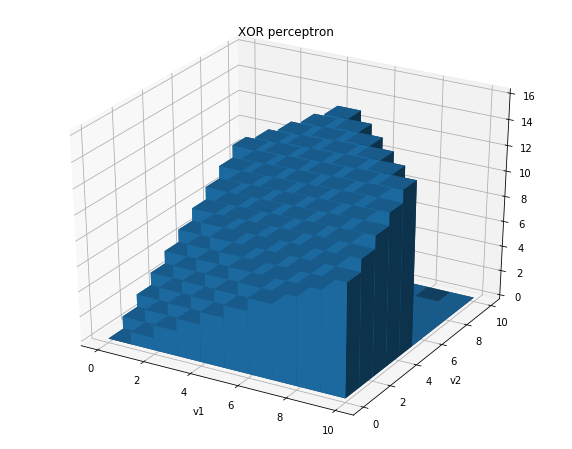

In [155]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


x_1 = np.arange(0, 1, 0.1)
x_2 = np.arange(0, 1, 0.1)

v = []

for i in range(len(x_1)):
  for j in range(len(x_2)):
    v.append([x_1[i], x_2[j]])

v_t = Variable(torch.Tensor(v), requires_grad=True)
y_n = model(v_t).reshape(-1).data.numpy()

# setup the figure and axes
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_zlim(0,16)
ax1.set_xlabel("v1")
ax1.set_ylabel("v2")

# fake data
_x = x_1 * 10
_y = x_2 * 10
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
# x, y = x_1, x_2
top = y_n * 10

bottom = np.zeros_like(top)
width = 1
depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('XOR perceptron')

plt.show()